<a href="https://colab.research.google.com/github/ShwetaBaranwal/HandsonML/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
data = make_blobs(n_samples = 100, n_features=2, centers=3, random_state=42)

In [10]:
X = data[0]
true_labels = data[1]

In [11]:
X.shape

(100, 2)

<Axes: >

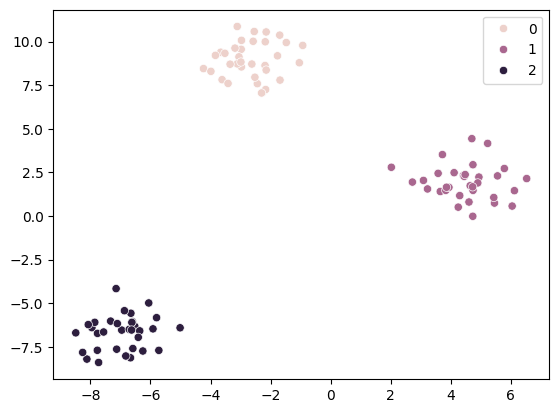

In [20]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue=true_labels)

In [21]:
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [23]:
euclidean(np.array([1,2]), np.array([3,4]))

2.8284271247461903

In [60]:
class Kmeans:
  def __init__(self, n_clusters=3, n_iter=50):
    self.K = n_clusters
    self.n_iter = n_iter
    self.clusters = [[] for _ in range(self.K)] # sample ids in each cluster
    self.centriod = []

  def fit(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape
    rand_idx = np.random.choice(self.n_samples, self.K, replace=False)
    self.centriod = [X[idx] for idx in rand_idx] # initial centroid

    for _ in range(self.n_iter):
      self.clusters = self._get_clusters(self.centriod)
      old_centriod = self.centriod
      self.centriod = self._get_centriod(self.clusters)
      if self._centriod_epsilon(old_centriod, self.centriod) < 0.01:
        break

    labels = self._get_labels(self.clusters)
    return labels


  def _get_clusters(self, centriod):
    clusters = [[] for _ in range(self.K)]
    for idx, sample in enumerate(self.X):
      distance = [euclidean(sample, c) for c in centriod]
      centriod_idx = np.argmin(distance)
      clusters[centriod_idx].append(idx)
    return clusters


  def _get_centriod(self, clusters):
    centriod = np.zeros((self.K, self.n_features))
    for centriod_idx, c in enumerate(clusters):
      c_centriod = np.mean(self.X[c], axis=0)
      centriod[centriod_idx] = c_centriod
    return centriod

  def _centriod_epsilon(self, old, new):
    return euclidean(old, new)


  def _get_labels(self, clusters):
    labels = np.empty(self.n_samples)
    for centriod_idx, c in enumerate(clusters):
      for idx in c:
        labels[idx] = centriod_idx
    return labels


  def predict(self, X):
    labels = np.empty(len(X))
    for idx, sample in enumerate(X):
      distance = [euclidean(sample, c) for c in self.centriod]
      labels[idx] = np.argmin(distance)
    return labels











In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, true_labels, test_size = 0.4, random_state=42)

In [62]:
kmeans = Kmeans()
y_train_pred = kmeans.fit(X_train).astype('int')

<Axes: >

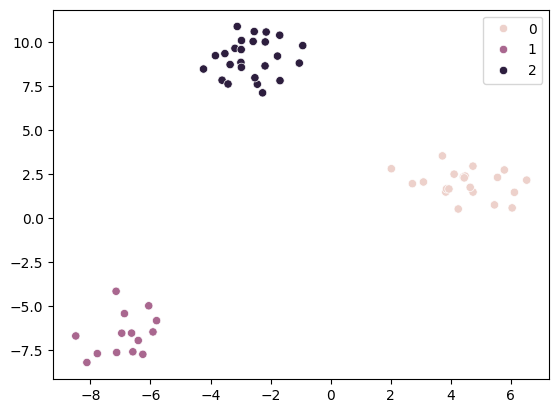

In [63]:
sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue = y_train_pred)

In [65]:
y_test_pred = kmeans.predict(X_test)

<Axes: >

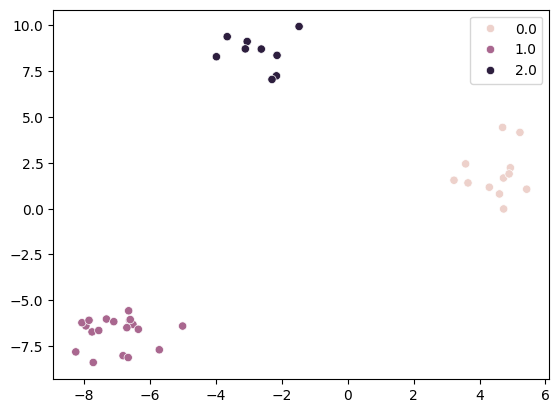

In [69]:
sns.scatterplot(x = X_test[:,0], y = X_test[:,1], hue = y_test_pred)

In [67]:
y_test_pred

array([1., 1., 0., 0., 2., 0., 1., 2., 2., 1., 1., 1., 2., 1., 0., 1., 0.,
       1., 1., 0., 1., 2., 0., 0., 0., 1., 1., 2., 2., 1., 1., 1., 2., 1.,
       0., 0., 0., 1., 2., 1.])